##**1 Caricamento Data Set**

### 1.1 Caricamento Data Set
**ISTRUZIONI**
*  Runnare questa riga
*  Cliccare il bottone upload
*  Selezionare il dataset tasks.csv in allegato con la Relazione

In [309]:
import pandas as pd
import numpy as np
import io
from google.colab import files
import torch

uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['tasks.csv']))

Saving tasks.csv to tasks (8).csv


### 1.2 Training e Testing del regressore lineare
**ISTRUZIONI**
*  Settare i prametri di questa riga
*  Runnare questa riga
*  Runnare l'intero paragrafo *2 Pre Processing dei dati*
*  Runnare l'intero paragrafo *3 Regressione Lineare*

In [321]:
lr_linear = 0.1
epochs_linear = 30
mode_train_linear = True #modalità test (True = attiva)
mode_test_linear = True #modalità test (True = attiva)

### 1.3 Training e Testing del regressore logistico
**ISTRUZIONI**
*  Settare i prametri di questa riga
*  Runnare questa riga
*  Runnare l'intero paragrafo *2 Pre Processing dei dati*
*  Runnare l'intero paragrafo *4 Regressione Logistica*

In [330]:
lr_logistic = 0.01
epochs_logistic = 50
mode_train_logistic = True #modalità test (True = attiva)
mode_test_logistic = True #modalità test (True = attiva)

### 1.4 Caricamento Data Set Inferenza
**ISTRUZIONI**
*  Eseguire le istruzioni indicate nel paragrafo 1.2 e 1.3
*  Caricare i dati da inferire runnando questa riga
*  Runnare l'intero paragrafo *2 Pre Processing dei dati*
*  Runnare l'intero paragrafo *5 Inferenza dei dati*

In [342]:
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['tasks_inference.csv']))

Saving tasks_inference.csv to tasks_inference (6).csv


##**2 Pre Processing dei dati**

### 2.1 Eliminazione features nulle
*   Eliminazione delle features con valori null per tutte i samples
*   Setting della feature **Issue key** come chiave dei samples

In [343]:
data = data.dropna(axis='columns', how='all')

In [344]:
data = data.set_index('Issue key')

### 2.2 Feautures selection
*   Eliminazione manuale delle features non significative
*   Unificazione di features multiple in un unica feature che indica il numero totale delle features specifiche non nulle. Esempio:

*Pre unificazione*

| Issue key | Commento 1 | Commento 2 | Commento 3 |
|------|------|------|------|
|   KEY1  | Comment Example 1| NA| Comment Example 3| 

*Post unificazione*

| Issue key | Commenti |
|------|------|
|   KEY1  | 2|

In [345]:
data = data.drop(['Summary', 'Created', 'Affects Version/s', 'Security Level', 'Time Spent', 'Work Ratio', 'Project type', 'Parent id', 'Issue id', 'Project key', 'Project name', 'Project lead', 'Project url', 'Updated', 'Votes'], axis=1)

In [346]:
data['Count Labels'] = data.filter(like='Labels').count(axis=1)
data = data.drop(data.filter(like='Labels'), axis='columns')
data['Count Watchers'] = data.filter(like='Watchers').count(axis=1)
data = data.drop(data.filter(like='Watchers'), axis='columns')
data['Count Comments'] = data.filter(like='Comment').count(axis=1)
data = data.drop(data.filter(like='Comment'), axis='columns')
data['Count Attachments'] = data.filter(like='Attachment').count(axis=1)
data = data.drop(data.filter(like='Attachment'), axis='columns')
data = data.drop(data.filter(like='Component/s.'), axis='columns')
data = data.drop(data.filter(like='Custom field (WSOwner).'), axis='columns')
data = data.drop(data.filter(like='Sprint.'), axis='columns')
data = data.drop(data.filter(like='Outward'), axis='columns')
data = data.drop(data.filter(like='Fix Version/s.'), axis='columns')
data = data.drop(data.filter(like='Log Work.'), axis='columns')

### 2.3 Ridenominazione features
Ridenominazione di alcune features in modo da renderle leggibili

In [347]:
data = data.rename(columns={"Custom field (Business Requestor)": "Business Requestor", "Custom field (Dev Team)": "Dev Team", "status": "Status", "Custom field (Environment)" : "Environment", "Custom field (Milestone)" : "Milestone", "Custom field (QA Team)" : "QA Team", "Custom field (WSOwner)" : "WSOwner", "Σ Original Estimate" : "Original Estimate", "Σ Remaining Estimate" : "Remaining Estimate", "Σ Time Spent" : "Time Spent"})

### 2.4 Tipizzazione features
*    Cambiamento di categorie di alcune features (esempio: da stringa a intero, da stringa a datetime)

In [348]:
data["Issue Type"] = data["Issue Type"].astype('category')
data["Issue Type Code"] = data["Issue Type"].cat.codes

data["Status"] = data["Status"].astype('category')
data["Status Code"] = data["Status"].cat.codes

data["Status"] = data["Status"].astype('category')
data["Status Code"] = data["Status"].cat.codes

data["Priority"] = data["Priority"].astype('category')
data["Priority Code"] = data["Priority"].cat.codes

data["Resolution"] = data["Resolution"].astype('category')
data["Resolution Code"] = data["Resolution"].cat.codes

data["Status"] = data["Status"].astype('category')
data["Status Code"] = data["Status"].cat.codes

data["Assignee"] = data["Assignee"].astype('category')
data["Assignee Code"] = data["Assignee"].cat.codes

data["Reporter"] = data["Reporter"].astype('category')
data["Reporter Code"] = data["Reporter"].cat.codes

data["Creator"] = data["Creator"].astype('category')
data["Creator Code"] = data["Creator"].cat.codes

data["Fix Version/s"] = data["Fix Version/s"].astype('category')
data["Fix Version/s Code"] = data["Fix Version/s"].cat.codes

data["Component/s"] = data["Component/s"].astype('category')
data["Component/s Code"] = data["Component/s"].cat.codes

data["Dev Team"] = data["Dev Team"].astype('category')
data["Dev Team Code"] = data["Dev Team"].cat.codes

data["Status"] = data["Status"].astype('category')
data["Status Code"] = data["Status"].cat.codes

data["Environment"] = data["Environment"].astype('category')
data["Environment Code"] = data["Environment"].cat.codes

data["Milestone"] = data["Milestone"].astype('category')
data["Milestone Code"] = data["Milestone"].cat.codes

data["QA Team"] = data["QA Team"].astype('category')
data["QA Team Code"] = data["QA Team"].cat.codes

data["Sprint"] = data["Sprint"].astype('category')
data["Sprint Code"] = data["Sprint"].cat.codes

data["WSOwner"] = data["WSOwner"].astype('category')
data["WSOwner Code"] = data["WSOwner"].cat.codes


In [349]:
data['Resolved'] = pd.to_datetime(data['Resolved'], infer_datetime_format=True)
data['Release Date'] = pd.to_datetime(data['Release Date'], infer_datetime_format=True)
data['Delivery Date'] = data['Release Date'] - data['Resolved']

In [350]:
data = data.select_dtypes(['number'])

In [351]:
def get_delivery_date(date):
      return date.days

data['Delivery Date'] = data['Delivery Date'].apply(get_delivery_date)

### 2.5 Eliminazione samples nulli
*Circa l'1% dei samples sono rimossi*

In [352]:
data = data.dropna()

### 2.6 Visualizzazione dei dati dopo il refactor

In [353]:
data

,Issue Type Code,Status Code,Priority Code,Resolution Code,Assignee Code,Reporter Code,Creator Code,Fix Version/s Code,Component/s Code,Dev Team Code,Environment Code,Milestone Code,QA Team Code,Sprint Code,WSOwner Code,Delivery Date
Issue key,,,,,,,,,,,,,,,,
KKK-25888,0,0,1,1,2,0,0,0,0,0,1,0,0,0,0,30
KKK-25889,1,0,0,2,0,0,0,0,1,-1,0,-1,-1,-1,-1,17
KKK-25160,2,1,0,0,1,1,1,0,2,-1,-1,-1,-1,1,1,18


##**3 Regressione Lineare**

### 3.1 Normalizzazione dati
*    Creazione del dataset di training
*    Creazione del dataset di test
*    Normalizzazione dei dati secondo il metodo zscore

In [322]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)
X_training = torch.Tensor(train.values)
Y_training = torch.Tensor(train["Delivery Date"].values)

In [323]:
X_testing = torch.Tensor(test.values)
Y_testing = torch.Tensor(test["Delivery Date"].values)

In [324]:
means = X_training.mean(0)
stds = X_training.std(0)
X_training_norm = torch.nan_to_num((X_training-means)/stds)
X_testing_norm = torch.nan_to_num((X_testing-means)/stds)

### 3.2 Creazione regressore lineare
*    Creazione del modello di regressione lineare

In [325]:
from torch import nn

class LinearRegressor(nn.Module):
  def __init__(self, in_size, out_size):
    super(LinearRegressor, self).__init__()

    self.linear = nn.Linear(in_size,out_size)

  def forward(self,x):
    result = self.linear(x)

    return result


### 3.3 Training e Testing del regressore lineare
*La funzione di loss utilizzata è la MSE*

In [326]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('logs/linear_regressor')

reg = LinearRegressor(16,1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(reg.parameters(),lr=lr_linear)
losses_train = []
losses_test = []
for e in range(epochs_linear):
  if(mode_train_linear == True):
    reg.train()
    output = reg(X_training_norm)
    l = criterion(output.view(-1),Y_training)
    losses_train.append(l.item())
    writer.add_scalar('loss/train', l.item(), global_step=e)

    l.backward()

    optimizer.step()
    optimizer.zero_grad()

  if(mode_test_linear == True):
    reg.eval()

    if(mode_train_linear == True):
      with torch.set_grad_enabled(False):
        y_test=reg(X_testing_norm)
        l = criterion(y_test.view(-1),Y_testing)
        losses_test.append(l.item())
        writer.add_scalar('loss/test', l.item(), global_step=e)
        
    else:
      y_test=reg(X_testing_norm)
      l = criterion(y_test.view(-1),Y_testing)
      losses_test.append(l.item())
      writer.add_scalar('loss/test', l.item(), global_step=e)
      l.backward()
      optimizer.step()
      optimizer.zero_grad()


### 3.4 Valutazione dei risultati del regressore lineare
*    Plot del grafico di epoche vs loss dei training e di test
*    Calcolo del MSE, MAE, RMSE di training e di test
*    Plot del grafico REC di training e di test

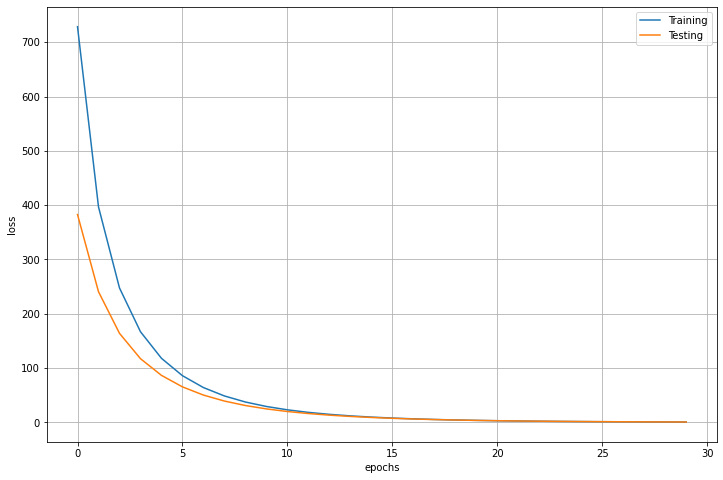

In [327]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(losses_train)
plt.plot(losses_test)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.legend(['Training','Testing'])
plt.show()

In [328]:
preds_training = reg(X_training_norm)
preds_testing = reg(X_testing_norm)

def MSE(predictions, gt):
  assert predictions.shape == gt.shape
  return ((predictions-gt)**2).mean()

print("Mean Squared Error (MSE) di training: {:0.2f}".format(MSE(preds_training.view(-1),Y_training)))
print("Mean Squared Error (MSE) di testing: {:0.2f}".format(MSE(preds_testing.view(-1),Y_testing)))

def RMSE(predictions, gt):
  assert predictions.shape == gt.shape
  return ((predictions-gt)**2).mean()**(1/2)
print("Root Mean Squared Error (RMSE) di training: {:0.2f}".format(RMSE(preds_training.view(-1),Y_training)))
print("Root Mean Squared Error (RMSE) di testing: {:0.2f}".format(RMSE(preds_testing.view(-1),Y_testing)))

def MAE(predictions, gt):
  assert predictions.shape == gt.shape
  return ((predictions-gt).abs()).mean()
print("Mean Absolute Error (MAE) di training: {:0.2f}".format(MAE(preds_training.view(-1),Y_training)))
print("Mean Absolute Error (MAE) di testing: {:0.2f}".format(MAE(preds_testing.view(-1),Y_testing)))

Mean Squared Error (MSE) di training: 0.51
Mean Squared Error (MSE) di testing: 0.66
Root Mean Squared Error (RMSE) di training: 0.72
Root Mean Squared Error (RMSE) di testing: 0.81
Mean Absolute Error (MAE) di training: 0.58
Mean Absolute Error (MAE) di testing: 0.66


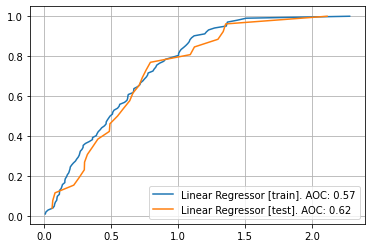

In [329]:
from matplotlib import pyplot as plt
def rec_curve(predictions, gt):
  assert predictions.shape == gt.shape
  errors = np.abs(np.array((predictions.detach()-gt)))
  tolerances = sorted(np.unique(errors))
  correct = []
  for t in tolerances:
    correct.append((errors<=t).mean())
  AUC = np.trapz(correct, tolerances)
  tot_area = np.max(tolerances)*1
  AOC = tot_area - AUC
  return tolerances, correct, AOC

linear_regressor_training_rec = rec_curve(preds_training.view(-1),Y_training)
linear_regressor_testing_rec = rec_curve(preds_testing.view(-1),Y_testing)
plt.plot(linear_regressor_training_rec[0], linear_regressor_training_rec[1])
plt.plot(linear_regressor_testing_rec[0], linear_regressor_testing_rec[1])
plt.legend(['Linear Regressor [train]. AOC: %0.2f'%linear_regressor_training_rec[2],'Linear Regressor [test]. AOC: %0.2f'%linear_regressor_testing_rec[2]])
plt.grid()
plt.show()

##**4 Regressione Logistica**

### 4.1 Normalizzazione dati
*    Creazione del dataset di training
*    Creazione del dataset di test
*    Normalizzazione dei dati secondo il metodo zscore

In [331]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)
X_training = torch.Tensor(train.values)
Y_training = torch.Tensor(train["Status Code"].values)

In [332]:
X_testing = torch.Tensor(test.values)
Y_testing = torch.Tensor(test["Status Code"].values)

In [333]:
means = X_training.mean(0)
stds = X_training.std(0)
X_training_norm = torch.nan_to_num((X_training-means)/stds)
X_testing_norm = torch.nan_to_num((X_testing-means)/stds)

### 4.2 Creazione regressore logistico
*    Creazione del modello di regressione logistica

In [334]:
from torch import nn

class LogisticRegressor(nn.Module):
  def __init__(self, in_features):
    super(LogisticRegressor, self).__init__() 
    self.linear = nn.Linear(in_features,1) 
    self.logistic = nn.Sigmoid()

  def forward(self,x):
    logits = self.linear(x)
    return self.logistic(logits)

### 4.3 Training e Testing del regressore logistico
*La funzione di loss utilizzata è la BCEWithLogitsLoss*

In [335]:
def accuracy(pred,gt):
  correct = pred.view(-1).byte()==gt.view(-1).byte()
  return float(correct.sum())/len(correct)

In [336]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('logs/logistic_regressor_3')


means = X_training.mean(0)
stds = X_training.std(0)
X_training_norm = (X_training-means)/stds
X_testing_norm = (X_testing-means)/stds
regressor = LogisticRegressor(16)
loss = nn.BCEWithLogitsLoss()
sgd = torch.optim.SGD(regressor.parameters(), lr_logistic)
logistic = nn.Sigmoid()

for e in range(epochs_logistic):
  regressor.train()
  z = regressor(X_training_norm)
  l = loss(z, Y_training.view(-1,1))
  l.backward()
  writer.add_scalar('loss/train',l.item(),global_step=e)
  sgd.step()
  sgd.zero_grad()

  p=logistic(z)
  writer.add_scalar('accuracy/train',accuracy(p>=0.5,Y_training),global_step=e)

  regressor.eval()
  with torch.set_grad_enabled(False):
    z = regressor(X_testing_norm)
    l = loss(z, Y_testing.view(-1,1))
    writer.add_scalar('loss/test',l.item(),global_step=e)

    p=logistic(z)
    writer.add_scalar('accuracy/test',accuracy(p>=0.5,Y_testing),global_step=e)


In [337]:
preds_training = logistic(regressor(X_training_norm))>=0.5
preds_testing = logistic(regressor(X_testing_norm))>=0.5

### 4.4 Valutazione dei risultati del regressore logistico
*    Calcolo della confusion matrix
*    Calcolo dell'accuracy, recall, precision F1 score di training e test
*    Plot del grafico REC di training e di test

In [338]:
from sklearn.metrics import confusion_matrix
cm_training = confusion_matrix(Y_training,preds_training)
cm_testing = confusion_matrix(Y_testing,preds_testing)
cm_testing = cm_testing.astype(float)/cm_testing.sum(1).reshape(-1,1)
print(cm_testing)

[[0. 1.]
 [0. 1.]]


In [339]:
from sklearn.metrics import accuracy_score
acc_training = accuracy_score(Y_training,preds_training)
acc_testing = accuracy_score(Y_testing,preds_testing)
print("Accuracy di training: {:0.2f}".format(acc_training))
print("Accuracy di test: {:0.2f}".format(acc_testing))

Accuracy di training: 0.51
Accuracy di test: 0.54


In [340]:
from sklearn.metrics import precision_score, recall_score
precision_training = precision_score(Y_training, preds_training)
precision_test = precision_score(Y_testing, preds_testing)
recall_training = recall_score(Y_training, preds_training)
recall_test = recall_score(Y_testing, preds_testing)
print(precision_training, recall_training)
print(precision_test, recall_test)

0.5098039215686274 1.0
0.5384615384615384 1.0


In [341]:
from sklearn.metrics import f1_score
scores_training = f1_score(Y_training,preds_training, average=None)
scores_testing = f1_score(Y_testing,preds_testing, average=None)
print(scores_training.mean())
print(scores_testing.mean())

0.33766233766233766
0.35000000000000003


##**5 Inferenza dei dati**

In [354]:
X_inference = torch.Tensor(data.values)
means = X_training.mean(0)
stds = X_training.std(0)
X_inference_norm = torch.nan_to_num((X_inference-means)/stds)
preds_inference_linear = reg(X_inference_norm)
preds_inference_logistic = logistic(regressor(X_inference_norm))>=0.5


In [355]:
original_estimations_df = data[["Delivery Date"]]
original_estimations_predicted_column = original_estimations_df.iloc[:, 0]
original_status_df = data[["Status Code"]]
original_status_predicted_column = original_status_df.iloc[:, 0]

estimations_df = pd.DataFrame(preds_inference_linear.detach().numpy()).astype(int)
estimations_df = estimations_df.set_index(original_estimations_df.index)
estimations_predicted_column = estimations_df.iloc[:, 0]
status_df = pd.DataFrame(preds_inference_logistic.detach().numpy()).astype(int)
status_df = status_df.set_index(original_status_df.index)
status_predicted_column = status_df.iloc[:, 0]

datas = [original_estimations_predicted_column, estimations_predicted_column, original_status_predicted_column, status_predicted_column]
headers = ["Original Delivery Date", "Delivery Date Predicted", "Original Status", "Status Predicted"]
predicted_df = pd.concat(datas, axis=1, keys=headers)

predicted_df

,Original Delivery Date,Delivery Date Predicted,Original Status,Status Predicted
Issue key,,,,
KKK-25888,30,31,0,1
KKK-25889,17,18,0,1
KKK-25160,18,19,1,1
